In [1]:
import pandas as pd
import numpy as np
import visuals as vs
from time import time
%matplotlib inline

data=pd.read_csv("Dataset.csv")
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


# Data Exploration

In [2]:
data.shape

(45222, 14)

In [3]:
n_records=data.shape[0]
n_greater_50K=(data['income']=='>50K').sum()
n_atmost_50K=(data['income']=='<=50K').sum()
greater_percent=(n_greater_50K/n_atmost_50K)*100

print("Total number of records = ",n_records)
print("Records with income more than USD 50K = ",n_greater_50K)
print("Records with income atmost USD 50K = ",n_atmost_50K)
print("Percentage of records with income greater than USD 50K = {:.2f}%".format(greater_percent))

Total number of records =  45222
Records with income more than USD 50K =  11208
Records with income atmost USD 50K =  34014
Percentage of records with income greater than USD 50K = 32.95%


# Data : Input

## Transforming skewed continuous features

C:\Users\acer\Internship II\FinalProject\visuals.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


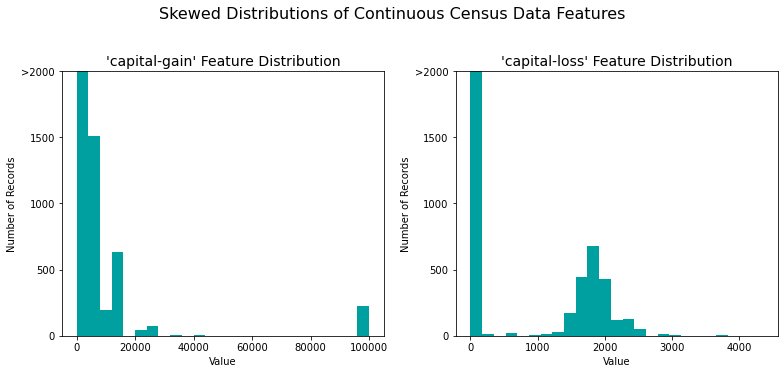

In [4]:
raw_income=data['income']
raw_features=data.drop('income',axis=1)
vs.distribution(data)

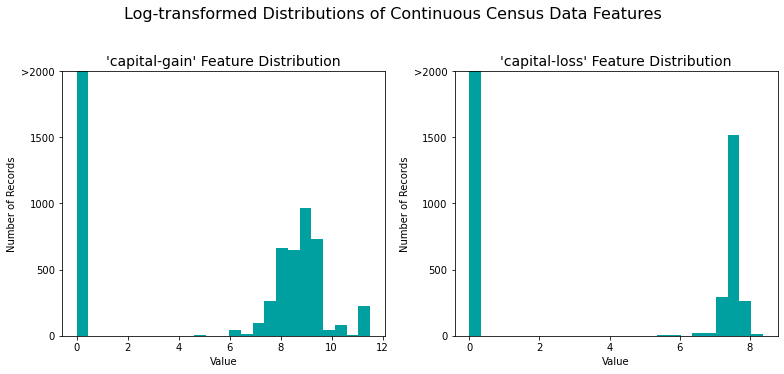

In [5]:
skewed=['capital-gain','capital-loss']
features_log_transformed=pd.DataFrame(raw_features)
features_log_transformed[skewed]=raw_features[skewed].apply(lambda x:np.log(x+1))

vs.distribution(features_log_transformed,transformed=True)

## Normalizing the numerical features (Min-Max)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
numerical=['age','education-num','capital-gain','capital-loss','hours-per-week']

features_log_minmax_transform=pd.DataFrame(data=features_log_transformed)
features_log_minmax_transform[numerical]=scaler.fit_transform(features_log_transformed[numerical])

display(features_log_minmax_transform.head(5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


# Data PreProcessing

In [7]:
features_final=pd.get_dummies(features_log_minmax_transform)
income=raw_income.apply(lambda x: 1 if x=='>50K' else 0)

encoded=list(features_final.columns)
print("{} total features after one-hot encoding".format(len(encoded)))

print(encoded)

103 total features after one-hot encoding
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ Ad

In [8]:
features_final.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Shuffling and Splitting the data

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(features_final,income,test_size=0.15,random_state=0)

print("Training set has {} set of records".format(x_train.shape[0]))
print("Testing set has {} set of records".format(x_test.shape[0]))

Training set has 38438 set of records
Testing set has 6784 set of records


# Evaluating Model Performance

### Naive Predictor Values

In [13]:
TP=np.sum(income)
FP=income.count()-TP
TN=0
FN=0
accuracy=(float)(TP+TN)/(TP+TN+FP+FN)
precision=(float)(TP)/(TP+FP)
recall=(float)(TP)/(TP+FN)
f_score=(2*precision*recall)/(precision+recall)
print("Naive Predictor")
print("#Accuracy score = {:.4f}".format(accuracy))
print("#F-score = {:.4f}".format(f_score))

Naive Predictor
#Accuracy score = 0.2478
#F-score = 0.3972


### Implementation various algorithms

### 1...Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

tree=DecisionTreeClassifier(random_state=20)
tree.fit(x_train,y_train)

pred_test_tree=tree.predict(x_test)
class_report_M1=classification_report(y_test,pred_test_tree)
accuracy_M1=accuracy_score(y_test,pred_test_tree)

print("Decision Tree")
print("Accuracy : ",accuracy_M1)
print(class_report_M1)

Decision Tree
Accuracy :  0.8130896226415094
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5155
           1       0.61      0.61      0.61      1629

    accuracy                           0.81      6784
   macro avg       0.74      0.74      0.74      6784
weighted avg       0.81      0.81      0.81      6784



### 2...AdaBoostClassifier

In [12]:
from sklearn.ensemble import AdaBoostClassifier

adaboost=AdaBoostClassifier(random_state=50)
adaboost.fit(x_train,y_train)

pred_test_ADB=adaboost.predict(x_test)
accuracy_M2=accuracy_score(y_test,pred_test_ADB)
class_report_M2=classification_report(y_test,pred_test_ADB)

print("AdaBoostClassifier")
print("Accuracy : ",accuracy_M2)
print(class_report_M2)

AdaBoostClassifier
Accuracy :  0.8555424528301887
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5155
           1       0.75      0.60      0.67      1629

    accuracy                           0.86      6784
   macro avg       0.82      0.77      0.79      6784
weighted avg       0.85      0.86      0.85      6784



### 3...GradientBoostingClassifier

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier(random_state=20)
gbc.fit(x_train,y_train)

pred_test_GBC=gbc.predict(x_test)
accuracy_M3=accuracy_score(y_test,pred_test_GBC)
class_report_M3=classification_report(y_test,pred_test_GBC)

print("Gradient Boosting Classifier")
print("Accuracy : ",accuracy_M3)
print(class_report_M3)

Gradient Boosting Classifier
Accuracy :  0.8604068396226415
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5155
           1       0.77      0.60      0.67      1629

    accuracy                           0.86      6784
   macro avg       0.83      0.77      0.79      6784
weighted avg       0.85      0.86      0.85      6784



### 4...SVM

In [17]:
from sklearn.svm import SVC

svm=SVC(random_state=60)
svm.fit(x_train,y_train)

pred_test_SVM=svm.predict(x_test)
accuracy_M4=accuracy_score(y_test,pred_test_SVM)
class_report_M4=classification_report(y_test,pred_test_SVM)

print("Support Vector Machine")
print("Accuracy : {}".format(accuracy_M4))
print("{}".format(class_report_M4))

Support Vector Machine
Accuracy : 0.8403596698113207
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      5155
           1       0.70      0.58      0.63      1629

    accuracy                           0.84      6784
   macro avg       0.79      0.75      0.77      6784
weighted avg       0.83      0.84      0.83      6784



### 5...SGD Classifier

In [19]:
from sklearn.linear_model import SGDClassifier

sgd=SGDClassifier(random_state=5,max_iter=7,tol=None)
sgd.fit(x_train,y_train)

pred_test_SGD=sgd.predict(x_test)
accuracy_M5=accuracy_score(y_test,pred_test_SGD)
class_report_M5=classification_report(y_test,pred_test_SGD)

print("SGD Classifier")
print("Accuracy : {}".format(accuracy_M5))
print("{}".format(class_report_M5))

SGD Classifier
Accuracy : 0.8256191037735849
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      5155
           1       0.80      0.37      0.50      1629

    accuracy                           0.83      6784
   macro avg       0.81      0.67      0.70      6784
weighted avg       0.82      0.83      0.80      6784



### Model Tuning

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,fbeta_score

clf=GradientBoostingClassifier(random_state=0)

parameters={'n_estimators':[100,300,500]}

scorer=make_scorer(fbeta_score,beta=0.5)

grid_obj=GridSearchCV(clf,parameters,scoring=scorer)
grid_fit=grid_obj.fit(x_train,y_train)

best_clf=grid_fit.best_estimator_

predictions=(clf.fit(x_train,y_train)).predict(x_test)
best_predictions=best_clf.predict(x_test)

print("Unoptimized Model")
print("Accuracy score on testing data : {:.4f}".format(accuracy_score(y_test,predictions)))
print("F-score on testing data : {:.4f}".format(fbeta_score(y_test,predictions,beta=0.5)))

print("\n\nOptimized Model")
print("Accuracy score on testing data : {:.4f}".format(accuracy_score(y_test,best_predictions)))
print("F-score on testing data : {:.4f}".format(fbeta_score(y_test,best_predictions,beta=0.5)))

Unoptimized Model
Accuracy score on testing data : 0.8604
F-score on testing data : 0.7276


Optimized Model
Accuracy score on testing data : 0.8690
F-score on testing data : 0.7436


In [22]:
print(best_clf)

GradientBoostingClassifier(n_estimators=500, random_state=0)


### Feature Relevance Observation

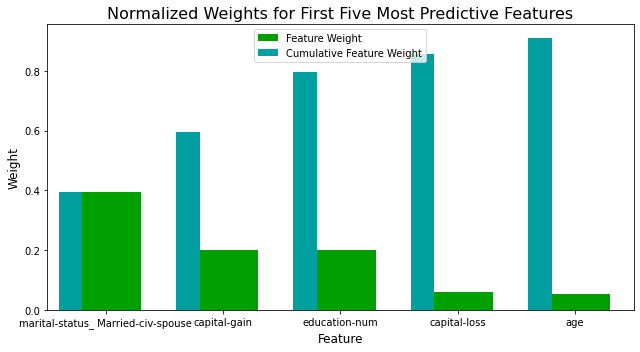

In [23]:
model=GradientBoostingClassifier(random_state=0)
model=model.fit(x_train,y_train)
importances=model.feature_importances_

vs.feature_plot(importances,x_train,y_train)

### Feature Selection

In [24]:
from sklearn.base import clone

x_train_reduced=x_train[x_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
x_test_reduced=x_test[x_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

clf=(clone(best_clf)).fit(x_train_reduced,y_train)

reduced_predictions=clf.predict(x_test_reduced)\

print("Final Model trained on full data")
print("Accuracy on testing data : {:.4f}".format(accuracy_score(y_test,best_predictions)))
print("F-score on testing data : {:.4f}".format(fbeta_score(y_test,best_predictions,beta=0.5)))
print("\n\nFinal Model on reduced data")
print("Accuracy on testing data : {:.4f}".format(accuracy_score(y_test,reduced_predictions)))
print("F-score on testing data : {:.4f}".format(fbeta_score(y_test,reduced_predictions,beta=0.5)))

Final Model trained on full data
Accuracy on testing data : 0.8690
F-score on testing data : 0.7436


Final Model on reduced data
Accuracy on testing data : 0.8589
F-score on testing data : 0.7194
